In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar

In [66]:
folderName = 文件的路径地址
fileName = folderName + 文件名
data = pd.read_excel(fileName,sheet_name='Sheet1')

In [69]:
# 筛选支付状态为成功的数据
data = data[data['状态'] == '成功']

{'冲正', '年费', '提现', '消费', '退款'}

In [60]:
'''
# 交易类型是消费和提现的总unique人数
screenData = data[data['交易类型'] == '消费'].append(data[data['交易类型'] == '提现'])
len(set(screenData['用户uid']))
'''

### 自动获取日期

In [22]:


# 今天的日期
today = datetime.date.today()

# 昨天的日期
yesterday = (datetime.date.today() + datetime.timedelta(days=-1)).strftime('%Y-%m-%d')
yesterday = datetime.datetime.strptime(yesterday, "%Y-%m-%d")
yesterday = yesterday.date()

In [23]:
# 获取上周日日期
def getLastSunday():

    today = datetime.date.today()

    oneday = datetime.timedelta(days = -1)

    m1 = calendar.SUNDAY

    while today.weekday() != m1:
        today += oneday

    lastSunday = today.strftime('%Y-%m-%d')

    return datetime.datetime.strptime(lastSunday, "%Y-%m-%d").date()


# 获取上周一日期
def getLastMonday():

    lastSunday = getLastSunday()

    oneday = datetime.timedelta(days = -1)

    m1 = calendar.MONDAY

    while lastSunday.weekday() != m1:
        lastSunday += oneday

    lastMonday = lastSunday.strftime('%Y-%m-%d')

    return datetime.datetime.strptime(lastMonday, "%Y-%m-%d").date()


In [24]:
import xlwings as xw

In [25]:
reportName = 分析结果保存的excel地址
wb1 = xw.Book(reportName)
detail_sheet1 = xw.Sheet("Sheet1")


detail_sheet1.range('H2').options(transpose=True).value='消费'
detail_sheet1.range('J2').options(transpose=True).value='交易笔数'
detail_sheet1.range('K2').options(transpose=True).value='交易金额'
detail_sheet1.range('L2').options(transpose=True).value='交易人数'
detail_sheet1.range('M2').options(transpose=True).value='首次交易人数'
detail_sheet1.range('N2').options(transpose=True).value='笔均数额'

detail_sheet1.range('H6').options(transpose=True).value='提现'
detail_sheet1.range('J6').options(transpose=True).value='交易笔数'
detail_sheet1.range('K6').options(transpose=True).value='交易金额'
detail_sheet1.range('L6').options(transpose=True).value='交易人数'
detail_sheet1.range('M6').options(transpose=True).value='首次交易人数'
detail_sheet1.range('N6').options(transpose=True).value='笔均数额'


### 统计昨天信息

In [26]:

# 昨天统计
yesterdayData = data[data['交易时间'].apply(lambda x : x.month == yesterday.month  and x.day == yesterday.day )]
# 获取昨天之前的数据
yesBefor = data[data['交易时间'].apply(lambda x : (x.month == 7 and x.day < yesterday.day) or (x.month < yesterday.month )  )]

for subData in yesBefor.groupby('交易类型'):
    if subData[0] == '消费':
        yesBeforUconsume = list(set(subData[1]['用户uid']))
    elif subData[0] == '提现':
        yesBeforUdraw = list(set(subData[1]['用户uid']))
        

for subData in yesterdayData.groupby('交易类型'):
    if subData[0] == '消费':
        yes_consume = {}
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = subData[1]['交易金额'].sum() / len(subData[1]['交易订单ID'])
       
        
        for i in set(subData[1]['用户uid']):
            if i not in yesBeforUconsume:
                newUser.append(i)
        
        detail_sheet1.range('I3').options(transpose=True).value='昨日:'+str(yesterday)
        detail_sheet1.range('J3').options(transpose=True).value=tradeTotal
        detail_sheet1.range('K3').options(transpose=True).value=tradeAmount
        detail_sheet1.range('L3').options(transpose=True).value= tradeNum
        detail_sheet1.range('M3').options(transpose=True).value= len(newUser)
        detail_sheet1.range('N3').options(transpose=True).value= aveTrade
        wb1.save()
        
    if subData[0] == '提现':
        
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = subData[1]['交易金额'].sum() / len(subData[1]['交易订单ID'])
        
        for i in set(subData[1]['用户uid']):
            if i not in yesBeforUdraw:
                newUser.append(i)
        
        
        detail_sheet1.range('I7').options(transpose=True).value='昨日:'+str(yesterday)
        detail_sheet1.range('J7').options(transpose=True).value = tradeTotal
        detail_sheet1.range('K7').options(transpose=True).value = tradeAmount
        detail_sheet1.range('L7').options(transpose=True).value = tradeNum
        detail_sheet1.range('M7').options(transpose=True).value = len(newUser)
        detail_sheet1.range('N7').options(transpose=True).value = aveTrade
        wb1.save()


### 上周的数据

In [27]:

lastWeekData  = data[data['交易时间'].apply(lambda x : (x.month == getLastSunday().month  and x.day <= getLastSunday().day) 
                                        and ( x.month == getLastMonday().month and x.day >= getLastMonday().day  ))]
# 获取上周之前的数据
lastWeekBefor = data[data['交易时间'].apply(lambda x : (x.month == getLastMonday().month and x.day < getLastMonday().day) 
                                        or (x.month < getLastMonday().month )  )]

for subData in lastWeekBefor.groupby('交易类型'):
    if subData[0] == '消费':
        lastWeekBeforUconsume = list(set(subData[1]['用户uid']))
    elif subData[0] == '提现':
        lastWeekBeforUdraw = list(set(subData[1]['用户uid']))


for subData in lastWeekData.groupby('交易类型'):
    if subData[0] == '消费':
        yes_consume = {}
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = subData[1]['交易金额'].sum() / len(subData[1]['交易订单ID'])
        
        for i in set(subData[1]['用户uid']):
            if i not in lastWeekBeforUconsume:
                newUser.append(i)
        
        detail_sheet1.range('I4').options(transpose=True).value='上周:'+str(getLastMonday())+'~'+str(getLastSunday())
        detail_sheet1.range('J4').options(transpose=True).value=tradeTotal
        detail_sheet1.range('K4').options(transpose=True).value=tradeAmount
        detail_sheet1.range('L4').options(transpose=True).value= tradeNum
        detail_sheet1.range('M4').options(transpose=True).value= len(newUser)
        detail_sheet1.range('N4').options(transpose=True).value= aveTrade
        wb1.save()
        
    if subData[0] == '提现':
        yes_drawing = {}
        
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = tradeAmount / tradeTotal
        
        for i in set(subData[1]['用户uid']):
            if i not in lastWeekBeforUdraw:
                newUser.append(i)
        
        detail_sheet1.range('I8').options(transpose=True).value='上周:'+str(getLastMonday())+'~'+str(getLastSunday())
        detail_sheet1.range('J8').options(transpose=True).value = tradeTotal
        detail_sheet1.range('K8').options(transpose=True).value = tradeAmount
        detail_sheet1.range('L8').options(transpose=True).value = tradeNum
        detail_sheet1.range('M8').options(transpose=True).value = len(newUser)
        detail_sheet1.range('N8').options(transpose=True).value = aveTrade
        wb1.save()

### 历史数据

In [28]:

historyData  = data[~data['交易时间'].apply(lambda x : x.month == today.month  and x.day == today.day  )]

for subData in historyData.groupby('交易类型'):
    if subData[0] == '消费':
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = tradeAmount / tradeTotal
    
        detail_sheet1.range('I5').options(transpose=True).value='历史信息<'+str(today)
        detail_sheet1.range('J5').options(transpose=True).value=tradeTotal
        detail_sheet1.range('K5').options(transpose=True).value=tradeAmount
        detail_sheet1.range('L5').options(transpose=True).value= tradeNum
        detail_sheet1.range('N5').options(transpose=True).value= aveTrade
        wb1.save()
        
    if subData[0] == '提现':       
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = tradeAmount / tradeTotal   
    
        detail_sheet1.range('I9').options(transpose=True).value='历史信息<'+str(today)
        detail_sheet1.range('J9').options(transpose=True).value = tradeTotal
        detail_sheet1.range('K9').options(transpose=True).value = tradeAmount
        detail_sheet1.range('L9').options(transpose=True).value = tradeNum
        detail_sheet1.range('N9').options(transpose=True).value = aveTrade

        wb1.save()

### 绘图

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman' # 中文除外的设置成New Roman，中文设置成宋体


In [13]:
data['交易时间'] = data['交易时间'].apply( lambda x: datetime.datetime.strptime(x.strftime("%Y-%m-%d") ,"%Y-%m-%d"))

In [14]:

for subData in data.groupby('交易类型'):
    # 消费数据集
    if subData[0] == '消费':
        
        consumeData = subData[1]
    # 提现数据集
    if subData[0] == '提现':
        drawData = subData[1]

In [15]:
dateTime= []
consumeCount = [] # 消费人数
consumeTotal = [] # 消费笔数
consumeRate = [] # 消费均额
# 消费
for i,j in consumeData.groupby('交易时间'):
    dateTime.append(i)
    consumeCount.append(len(set(j['用户uid'])))
    consumeTotal.append(len(j['交易订单ID']))
    consumeRate.append(sum(j['交易金额']/len(j['交易订单ID'])))


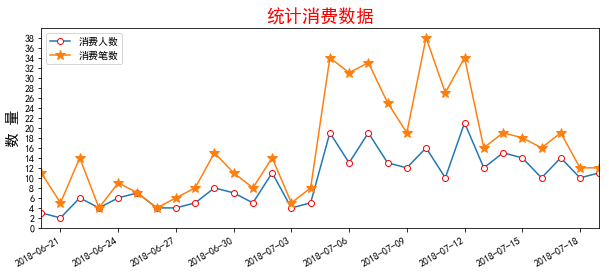

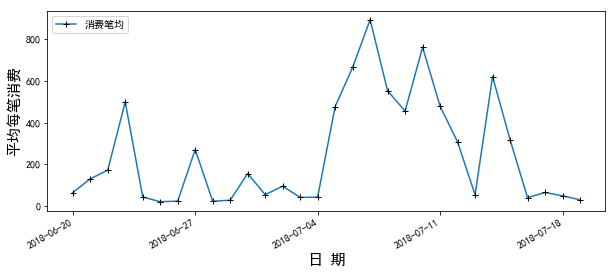

In [16]:
# 绘制消费数据

fig = plt.figure(figsize=(10,9)) 
ax1 = fig.add_subplot(211)
# mec 边界颜色；mfc 填充颜色；
plt.plot(dateTime, consumeCount, marker='o', mec='r', mfc='w',label='消费人数') 
plt.plot(dateTime, consumeTotal, marker='*', ms=10,label= '消费笔数')

plt.legend(loc='upper left')  # 让图例生效
plt.margins(0) # 收缩空白
plt.subplots_adjust(bottom=0.15)

# plt.xlabel("日 期",fontsize=10) #X轴标签
fig.autofmt_xdate(rotation = 30) # x轴标签倾斜30度


plt.ylabel("数 量",fontsize=15) #Y轴标签
plt.ylim((0, 40))  # 范围 
plt.yticks(np.arange(0, 40, 2)) # 刻度
plt.title("统计消费数据",fontsize=18,color='r') #标题

# 绘制笔均
fig = plt.figure(figsize=(10,9)) 
ax2 = fig.add_subplot(212)

plt.plot(dateTime,consumeRate,marker='+', mec='k', mfc='w',label = '消费笔均')
plt.legend(loc='upper left') 
plt.subplots_adjust(bottom=0.15)

plt.xlabel("日 期",fontsize=15) #X轴标签
plt.ylabel("平均每笔消费",fontsize=15) #Y轴标签
fig.autofmt_xdate(rotation = 30)


plt.show()

In [17]:
# 提现

drawDateTime= []
drawCount = [] # 提现人数
drawTotal = [] # 提现笔数
drawRate = []

for i,j in drawData.groupby('交易时间'):
    drawDateTime.append(i)
    drawCount.append(len(set(j['用户uid'])))
    drawTotal.append(len(j['交易订单ID']))
    drawRate.append(sum(j['交易金额']/len(j['交易订单ID'])))

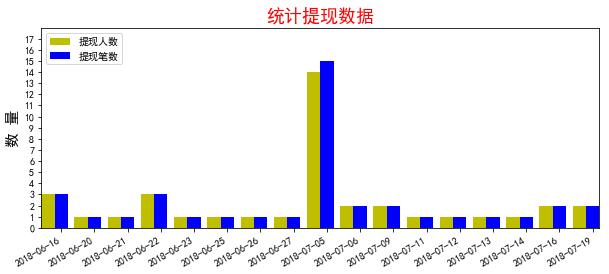

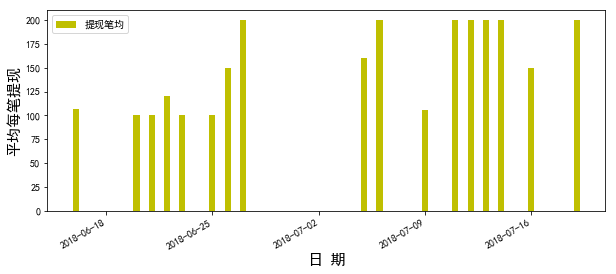

In [103]:
fig = plt.figure(figsize=(10,9)) 
ax1 = fig.add_subplot(211) 

# 折线图
#plt.plot(drawDateTime, drawCount, marker='o', mec='r', mfc='w',label='提现人数')
#plt.plot(drawDateTime, drawTotal, marker='*', ms=10,label= '提现笔数')

# 柱状图
x =list(range(len(drawDateTime)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, drawCount,width=width,fc = 'y',label='提现人数')
for i in range(len(drawDateTime)):
    x[i] = x[i] + width

# 去掉drawDateTime结尾的时间保留日期    
dts = []    
for dt in drawDateTime:
    dts.append(str(dt).split(' ')[0])
plt.bar(x, drawTotal,width=width,fc = 'b',tick_label = dts,label= '提现笔数')


plt.legend(loc='upper left')  # 让图例生效
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
#plt.xlabel("日 期",fontsize=10) #X轴标签
plt.ylabel("数 量",fontsize=15) #Y轴标签
plt.ylim((0, 18))
plt.yticks(np.arange(0, 18, 1))
plt.title("统计提现数据",fontsize=18,color='r') #标题
fig.autofmt_xdate(rotation = 30)



fig = plt.figure(figsize=(10,9))
ax2 = fig.add_subplot(212)

#plt.plot(drawDateTime,drawRate,marker='+', mec='k', mfc='w',label = '提现笔均')

# 柱状图
plt.bar(drawDateTime, drawRate,width=width,fc = 'y',label='提现笔均')
plt.legend(loc='upper left')
plt.subplots_adjust(bottom=0.15)

plt.xlabel("日 期",fontsize=15) #X轴标签
#plt.xticks(np.array(drawDateTime))
plt.ylabel("平均每笔提现",fontsize=15) #Y轴标签
fig.autofmt_xdate(rotation = 30)

plt.show()